**Kelompok 20**


---


1.   Muhammad Reza Adi Nugraha - 1301204078
2.   Regita Indri - 1301204083






# **Library 📚** 

In [3]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from tpot import TPOTClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

# **Formulasi Masalah ✍**

Masalah : Terdapat dataset yang digunakan untuk mengklasifikasi apakah terdiagnosis M atau B.


Solusi  : Gunaka AutoML untuk menentukan metode machine learning terbaik yang digunakan untuk melakukan klasifikai diagnosis.

# **Persiapan Data 🧹**

   
*   Membaca data
*   Format Data
*   Missing Value
*   Outlier
*   Korelasi data
*   Normalisasi





## Membaca data

In [93]:
# Membaca dataset training
df_train = pd.read_csv("https://github.com/reindri/ML_Lanjut/blob/main/train.csv?raw=true")
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.1471,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.1279,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.1052,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198,0.1043,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4,0.1625,0.2364,0.07678


In [94]:
# Membaca dataset testing
df_test = pd.read_csv("https://github.com/reindri/ML_Lanjut/blob/main/test.csv?raw=true")
df_test.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.18600,0.08288,0.3210,0.07863
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.65560,0.13570,0.2845,0.12490
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,14.80,25.46,100.90,689.1,0.1351,0.3549,0.45040,0.11810,0.2563,0.08174
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


## Format data

In [95]:
# Ukuran data
df_train.shape

(463, 32)

In [96]:
# Kolom numerik
kolom_numerik = df_train._get_numeric_data().columns

print(kolom_numerik)
print("Jumlah : ", len(kolom_numerik))

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Jumlah :  25


In [97]:
# Kolom kategorikal
kolom_kategorikal = []
for kolom in df_train:
  if kolom not in kolom_numerik:
    kolom_kategorikal.append(kolom)

print(kolom_kategorikal)
print("Jumlah :", len(kolom_kategorikal))

['diagnosis', 'concavity_mean', 'concave points_mean', 'concavity_se', 'concave points_se', 'concavity_worst', 'concave points_worst']
Jumlah : 7


Berdasarkan hasil pengecekan terdapat 7 kolom kategorikal, tetapi jika melihat dalam data. Hanya terdapat 1 kolom kategorikal yaitu "diagnosis". 6 kolom lainnya menjadi kategorikal dikarenakan nilai NULL yang menggunakan string "?". Sehingga perlu dilakukan penghilangan nilai NULL terlebih dahulu.

In [98]:
# Ubah kategorikal pada kolom diagnosis menjadi 0 dan 1
df_train['diagnosis'] = df_train['diagnosis'].replace('M', 0)
df_train['diagnosis'] = df_train['diagnosis'].replace('B', 1)

## Missing value

In [99]:
# Pengecekan nilai NULL
missing_values_sum = df_train.isnull().sum()

for column in df_train.columns:
    print(f"Column '{column}': {missing_values_sum[column]} data NULL")

Column 'id': 0 data NULL
Column 'diagnosis': 0 data NULL
Column 'radius_mean': 0 data NULL
Column 'texture_mean': 0 data NULL
Column 'perimeter_mean': 0 data NULL
Column 'area_mean': 0 data NULL
Column 'smoothness_mean': 0 data NULL
Column 'compactness_mean': 0 data NULL
Column 'concavity_mean': 0 data NULL
Column 'concave points_mean': 0 data NULL
Column 'symmetry_mean': 0 data NULL
Column 'fractal_dimension_mean': 0 data NULL
Column 'radius_se': 0 data NULL
Column 'texture_se': 0 data NULL
Column 'perimeter_se': 0 data NULL
Column 'area_se': 0 data NULL
Column 'smoothness_se': 0 data NULL
Column 'compactness_se': 0 data NULL
Column 'concavity_se': 0 data NULL
Column 'concave points_se': 0 data NULL
Column 'symmetry_se': 0 data NULL
Column 'fractal_dimension_se': 0 data NULL
Column 'radius_worst': 0 data NULL
Column 'texture_worst': 0 data NULL
Column 'perimeter_worst': 0 data NULL
Column 'area_worst': 0 data NULL
Column 'smoothness_worst': 0 data NULL
Column 'compactness_worst': 0 da

### Penghilangan string "?"

In [100]:
print("Checking missing value")
print(df_train.isin(['?']).sum())

print("\nCounting total missing value")
print(df_train.isin(['?']).sum().sum())

Checking missing value
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Counting total missing value
42


In [101]:
# Ubah nilai "?" menjadi nilai NULL
df_train.replace("?", np.nan, inplace=True)

# Isi nilai NULL dengan nilai mean kolom tersebut
df_train = df_train.astype(float)
column_means = df_train.mean()
for column in df_train.columns:
    df_train[column].fillna(column_means[column], inplace=True)

In [102]:
print("Checking missing value")
print(df_train.isin(['?']).sum())

print("\nCounting total missing value")
print(df_train.isin(['?']).sum().sum())

Checking missing value
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Counting total missing value
0


In [103]:
# Kolom numerik
df_train.drop("id", axis=1, inplace=True)
kolom_numerik = df_train._get_numeric_data().columns
kolom_numerik = list(kolom_numerik)
kolom_numerik.remove("diagnosis")

print(kolom_numerik)
print("Jumlah : ", len(kolom_numerik))

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Jumlah :  30


## Outlier

In [104]:
# Mengganti outlier dengan nilai mean
def replace_outliers_with_mean(df):
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        lower_threshold = mean - 2 * std
        upper_threshold = mean + 2 * std
        df[column] = df[column].apply(lambda x: mean if x < lower_threshold or x > upper_threshold else x)
    return df

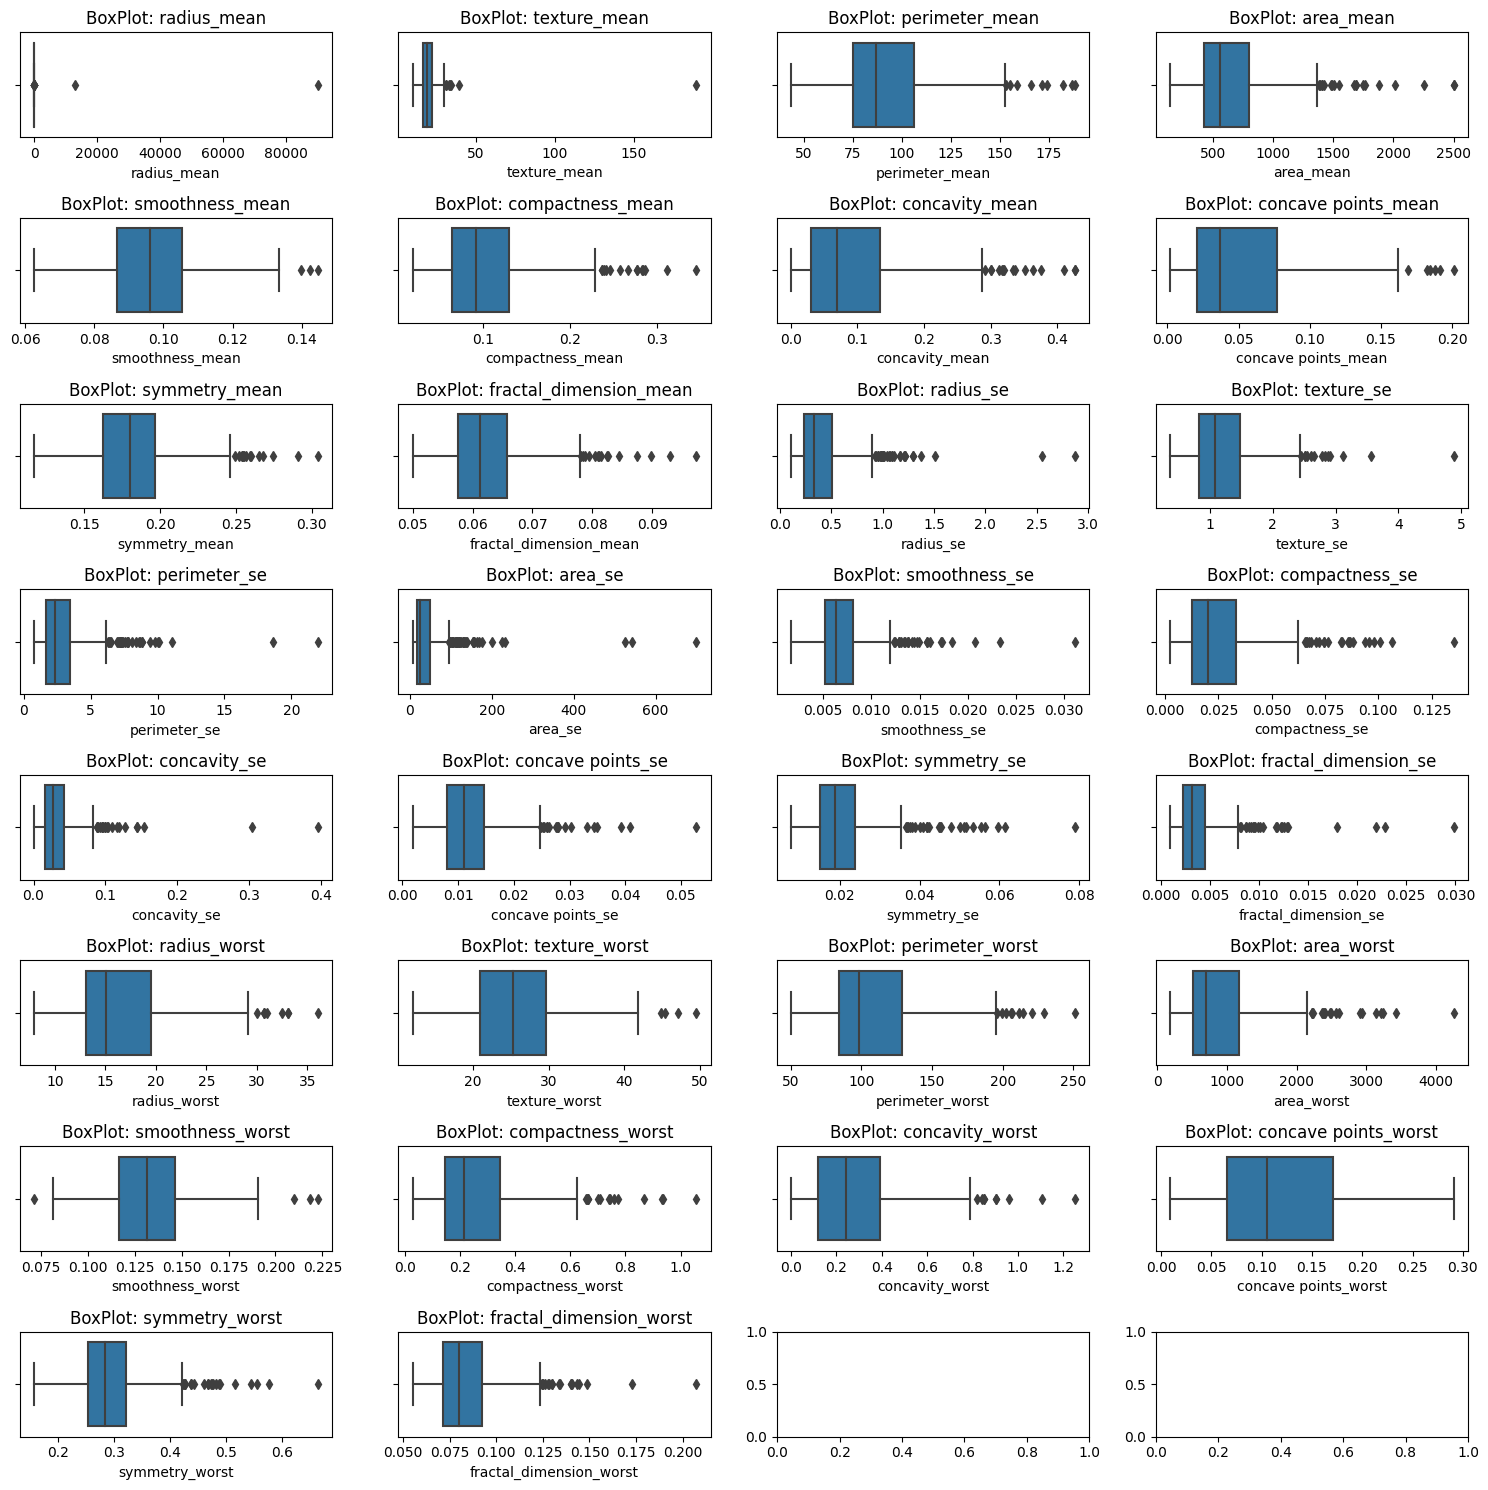

In [105]:
# Visualisasi Outlier
num_plots = len(kolom_numerik)
nrows = int((num_plots - 1) / 4) + 1
ncols = min(num_plots, 4)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

for i, kolom in enumerate(kolom_numerik):
    plt.subplot(nrows, ncols, i + 1)
    sns.boxplot(x=df_train[kolom], orient='horizontal')
    title = 'BoxPlot: ' + kolom
    plt.title(title)

plt.tight_layout()
plt.show()

In [106]:
df_train = replace_outliers_with_mean(df_train)

## Korelasi data

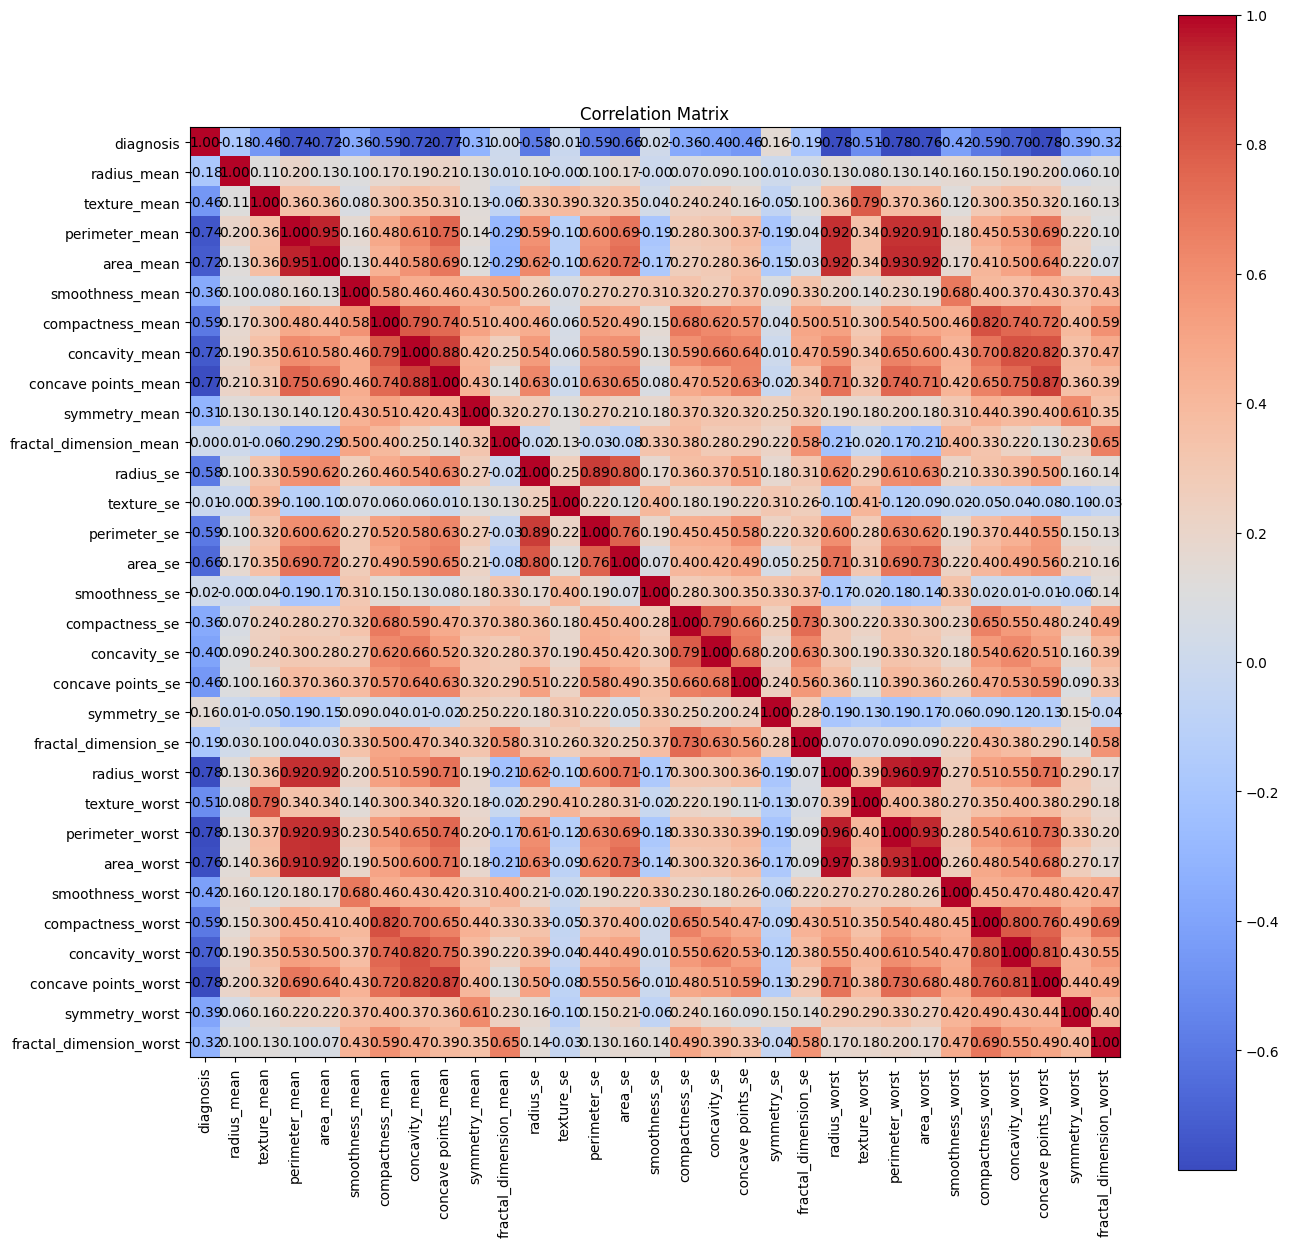

In [107]:
# Hitung korelasi matrix
corr_matrix = df_train.corr()

# Buat heatmap menggunakan matplotlib
plt.figure(figsize=(15, 15))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Ubah nama sumbu X dan sumbu Y sesuai dengan dataset
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

# Tampilkan korelasi tiap kolom
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center')

plt.title('Correlation Matrix')
plt.show()

In [108]:
# Mengonversi matriks korelasi menjadi Series
corr_series = corr_matrix.unstack()

# Mengambil nilai absolut dari korelasi sebelum mengurutkan
abs_corr_series = corr_series.abs()

# Mengurutkan pasangan kolom berdasarkan nilai korelasi yang mendekati nol
sorted_corr = abs_corr_series.sort_values()

# Mengambil 10 pasangan kolom dengan korelasi mendekati nol
low_corr_pairs = sorted_corr.head(10)

# Menampilkan 10 pasangan kolom dengan korelasi mendekati nol
print("10 pasangan kolom dengan korelasi mendekati nol:")
print(low_corr_pairs)

10 pasangan kolom dengan korelasi mendekati nol:
radius_mean             smoothness_se             0.000130
smoothness_se           radius_mean               0.000130
radius_mean             texture_se                0.001642
texture_se              radius_mean               0.001642
fractal_dimension_mean  diagnosis                 0.004043
diagnosis               fractal_dimension_mean    0.004043
concave points_worst    smoothness_se             0.005116
smoothness_se           concave points_worst      0.005116
symmetry_se             radius_mean               0.005154
radius_mean             symmetry_se               0.005154
dtype: float64


### Feature Selection

Berdasarkan perhitungan korelasi. Kolom yang memiliki korelasi rendah adalah radius mean dan smoothness_se. Sehingga kolom tersebut akan di drop.

In [109]:
df_train.drop("radius_mean", axis=1, inplace=True)
df_train.drop("smoothness_se", axis=1, inplace=True)

## Normalisasi

In [110]:
def normalisasi(data):
  return (data - data.min()) / (data.max() - data.min())

df_train = normalisasi(df_train)

## Split Data

In [111]:
X = df_train.drop("diagnosis", axis=1)
Y = df_train["diagnosis"]

In [112]:
# Split data into testing and training set. Use 80% for training
X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size = 0.8, random_state=1)

# **Pemodelan ⏳**

*   Pemodelan AutoML menggunakan library TPOT.
*   Evaluasi model dengan set validasi dengan menggunakan akurasi, presisi, recall, dan f1-score.



In [43]:
# Model yang digunakan pertama kali menggunakan generation 5, popoulatioin_size = 20, dan verbosity = 2.
model = TPOTClassifier(generations = 5,
                       population_size = 20,
                       verbosity = 2,
                       random_state = 1502)
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9621621621621623

Generation 2 - Current best internal CV score: 0.9648648648648648

Generation 3 - Current best internal CV score: 0.9648648648648648

Generation 4 - Current best internal CV score: 0.9648648648648648

Generation 5 - Current best internal CV score: 0.9648648648648648

Best pipeline: LogisticRegression(RobustScaler(RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=12, min_samples_split=2, n_estimators=100)), C=15.0, dual=False, penalty=l2)


TPOTClassifier(generations=5, population_size=20, random_state=1502,
               verbosity=2)

In [44]:
# Melakukan prediksi pada dataset validation (X_val)
y_pred_val = model.predict(X_val)

# Menghitung akurasi
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Akurasi:", accuracy_val)

# Menghitung presisi
precision_val = precision_score(y_val, y_pred_val)
print("Presisi:", precision_val)

# Menghitung recall
recall_val = recall_score(y_val, y_pred_val)
print("Recall:", recall_val)

# Menghitung F1-Score
f1_val = f1_score(y_val, y_pred_val)
print("F1-Score:", f1_val)


Akurasi: 0.978494623655914
Presisi: 0.9655172413793104
Recall: 1.0
F1-Score: 0.9824561403508771


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Eksperimen 🧪**


*   Pengubahan parameter pada model AutoML



## Penambahan Generasi

In [29]:
# Penambahan Generasi
model_1 = TPOTClassifier(generations = 10,
                       population_size = 20,
                       verbosity = 2,
                       random_state = 1502)
model_1.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9621621621621623

Generation 2 - Current best internal CV score: 0.9648648648648648

Generation 3 - Current best internal CV score: 0.9648648648648648

Generation 4 - Current best internal CV score: 0.9648648648648648

Generation 5 - Current best internal CV score: 0.9648648648648648

Generation 6 - Current best internal CV score: 0.9648648648648648

Generation 7 - Current best internal CV score: 0.9648648648648649

Generation 8 - Current best internal CV score: 0.9648648648648649

Generation 9 - Current best internal CV score: 0.9648648648648649

Generation 10 - Current best internal CV score: 0.9648648648648649

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=25.0, dual=False, penalty=l2)


TPOTClassifier(generations=10, population_size=20, random_state=1502,
               verbosity=2)

In [30]:
# Melakukan prediksi pada dataset validation (X_val)
y_pred_val = model_1.predict(X_val)

# Menghitung akurasi
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Akurasi:", accuracy_val)

# Menghitung presisi
precision_val = precision_score(y_val, y_pred_val)
print("Presisi:", precision_val)

# Menghitung recall
recall_val = recall_score(y_val, y_pred_val)
print("Recall:", recall_val)

# Menghitung F1-Score
f1_val = f1_score(y_val, y_pred_val)
print("F1-Score:", f1_val)

Akurasi: 0.967741935483871
Presisi: 0.9649122807017544
Recall: 0.9821428571428571
F1-Score: 0.9734513274336283


## Penambahan Populasi

In [26]:
# Penambahan Populasi
model_2 = TPOTClassifier(generations = 5,
                       population_size = 40,
                       verbosity = 2,
                       random_state = 1502)
model_2.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/240 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9621621621621623

Generation 2 - Current best internal CV score: 0.9648648648648649

Generation 3 - Current best internal CV score: 0.9702702702702704

Generation 4 - Current best internal CV score: 0.9702702702702704

Generation 5 - Current best internal CV score: 0.9702702702702704

Best pipeline: MLPClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=5, min_samples_split=12, n_estimators=100), alpha=0.001, learning_rate_init=0.01)


TPOTClassifier(generations=5, population_size=40, random_state=1502,
               verbosity=2)

In [28]:
# Melakukan prediksi pada dataset validation (X_val)
y_pred_val = model_2.predict(X_val)

# Menghitung akurasi
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Akurasi:", accuracy_val)

# Menghitung presisi
precision_val = precision_score(y_val, y_pred_val)
print("Presisi:", precision_val)

# Menghitung recall
recall_val = recall_score(y_val, y_pred_val)
print("Recall:", recall_val)

# Menghitung F1-Score
f1_val = f1_score(y_val, y_pred_val)
print("F1-Score:", f1_val)

Akurasi: 0.989247311827957
Presisi: 0.9824561403508771
Recall: 1.0
F1-Score: 0.9911504424778761


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


## Penambahan Generasi dan Populasi

In [31]:
# Penambahan Generasi dan Populasi
model_3 = TPOTClassifier(generations = 10,
                       population_size = 40,
                       verbosity = 2,
                       random_state = 1502)
model_3.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/440 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9621621621621623

Generation 2 - Current best internal CV score: 0.9648648648648649

Generation 3 - Current best internal CV score: 0.9702702702702704

Generation 4 - Current best internal CV score: 0.9702702702702704

Generation 5 - Current best internal CV score: 0.9702702702702704

Generation 6 - Current best internal CV score: 0.9702702702702704

Generation 7 - Current best internal CV score: 0.9702702702702704

Generation 8 - Current best internal CV score: 0.9702702702702704

Generation 9 - Current best internal CV score: 0.9702702702702704

Generation 10 - Current best internal CV score: 0.9702702702702704

Best pipeline: MLPClassifier(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=5, min_samples_split=12, n_estimators=100), alpha=0.001, learning_rate_init=0.01)


TPOTClassifier(generations=10, population_size=40, random_state=1502,
               verbosity=2)

In [32]:
# Melakukan prediksi pada dataset validation (X_val)
y_pred_val = model_3.predict(X_val)

# Menghitung akurasi
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Akurasi:", accuracy_val)

# Menghitung presisi
precision_val = precision_score(y_val, y_pred_val)
print("Presisi:", precision_val)

# Menghitung recall
recall_val = recall_score(y_val, y_pred_val)
print("Recall:", recall_val)

# Menghitung F1-Score
f1_val = f1_score(y_val, y_pred_val)
print("F1-Score:", f1_val)

Akurasi: 0.989247311827957
Presisi: 0.9824561403508771
Recall: 1.0
F1-Score: 0.9911504424778761


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


# **Evaluasi 📊**

*   Pemilihan Model
*   Drop kolom yang tidak dibutuhkan dalam data test.
*   Prediksi model menggunakan data test menggunakna model terpilih.




Berdasarkan hasil eksperimen. Jumlah populasi lebih berpengaruh terhadap hasil prediksi. Oleh karena itu, model yang digunakan adalah model 2.

In [33]:
model = model_2

In [115]:
df_test.drop(["radius_mean", "smoothness_se", "id"], axis=1, inplace=True)

(106, 28)

In [125]:
df_test_normal = normalisasi(df_test)

In [126]:
prediction = model.predict(df_test_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [130]:
# Masukan data prediksi ke dalam list
list_prediction = []
for value in prediction:
  if value == 0.0:
    list_prediction.append("B")
  elif value == 1.0:
    list_prediction.append("M")
print(list_prediction)

['M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M']


In [128]:
# Masukkan kolom diagnosis hasil prediksi ke dalam data test
diagnosis = {"diagnosis":list_prediction}
diagnosis = pd.DataFrame(diagnosis)
df_test["diagnosis"] = diagnosis

In [129]:
# Hasil prediksi dalam dataframe test
df_test

,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.366081,0.220786,0.145038,0.292949,0.101103,0.095817,0.116908,0.341062,0.142198,0.057114,...,0.343477,0.179543,0.106121,0.399855,0.157690,0.158974,0.312755,0.528447,0.242365,M
1,0.358842,0.309236,0.219622,0.198881,0.106822,0.138275,0.188816,0.294690,0.070637,0.074707,...,0.338930,0.258646,0.181363,0.345625,0.176931,0.160342,0.394340,0.215043,0.128239,M
2,0.457601,0.331264,0.222974,0.272727,0.363427,0.287422,0.186382,0.404637,0.274469,0.141594,...,0.395243,0.385389,0.199304,0.272415,0.628050,0.560342,0.512075,0.411122,0.805329,M
3,0.489142,0.323695,0.219382,0.308026,0.308287,0.308765,0.230921,0.375467,0.179363,0.170661,...,0.393844,0.295586,0.181950,0.407990,0.371055,0.384957,0.445660,0.320476,0.280204,M
4,0.352637,0.111754,0.069376,0.275165,0.083532,0.042089,0.037954,0.463725,0.269852,0.193099,...,0.364463,0.105853,0.061210,0.441432,0.089918,0.054778,0.094340,0.479267,0.243825,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.574457,0.800136,0.783311,0.526948,0.337092,0.694081,0.913816,0.498130,0.087719,0.902261,...,0.426723,0.710846,0.704894,0.461316,0.195068,0.351026,0.836226,0.158791,0.151357,B
102,0.877456,0.708284,0.652819,0.407782,0.285656,0.409789,0.644145,0.517577,0.066944,0.553374,...,0.841203,0.640150,0.589196,0.240781,0.171661,0.274786,0.614340,0.323369,0.093199,B
103,0.868666,0.513523,0.411649,0.288165,0.281129,0.263261,0.348816,0.396410,0.093490,0.290668,...,0.696747,0.459907,0.351939,0.216377,0.315293,0.290855,0.535094,0.209579,0.237133,B
104,0.933299,0.783977,0.655214,0.588336,1.000000,1.000000,1.000000,1.000000,0.409280,0.519803,...,0.882127,0.828673,0.624375,0.678236,1.000000,0.802308,1.000000,0.810350,0.794379,B


# **Kesimpulan ⭐**

Berdasarkan hasil eksperimen AutoML menggunakan TPOT. Model yang digunakan menggunakan generasi berjumlah 5 dengan jumlah populasi 40. Berdasarkan AutoML tersebut pipline terbaik adalah MLPClassifier. Pemilihan model ini berdasarkan set validasi yang digunakan memberikan hasil terbaik dengan rincian metrik evaluasi yang digunakan sebagai berikut:

*    Akurasi: 0.989247311827957
*    Presisi: 0.9824561403508771
*    Recall: 1.0
*    F1-Score: 0.9911504424778761

Oleh karena itu AutoML dapat mempermudah pengerjaan karena dapat mengotomatisasi sebagian besar tugas yang terkait dengan membangun, melatih, dan mengevaluasi model machine learning. Hal ini mengurangi waktu dan upaya yang diperlukan untuk melakukan langkah-langkah tersebut secara manual, sehingga meningkatkan produktivitas.

